In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('./dataset.xlsx', sheet_name='emergencia')

In [3]:
df.dtypes   # Verificamos los tipos de datos de las columnas

ID_ATENCION                 int64
INICIO_ATENCION    datetime64[ns]
FIN_ATENCION       datetime64[ns]
GENERO                     object
ID_PACIENTE                 int64
dtype: object

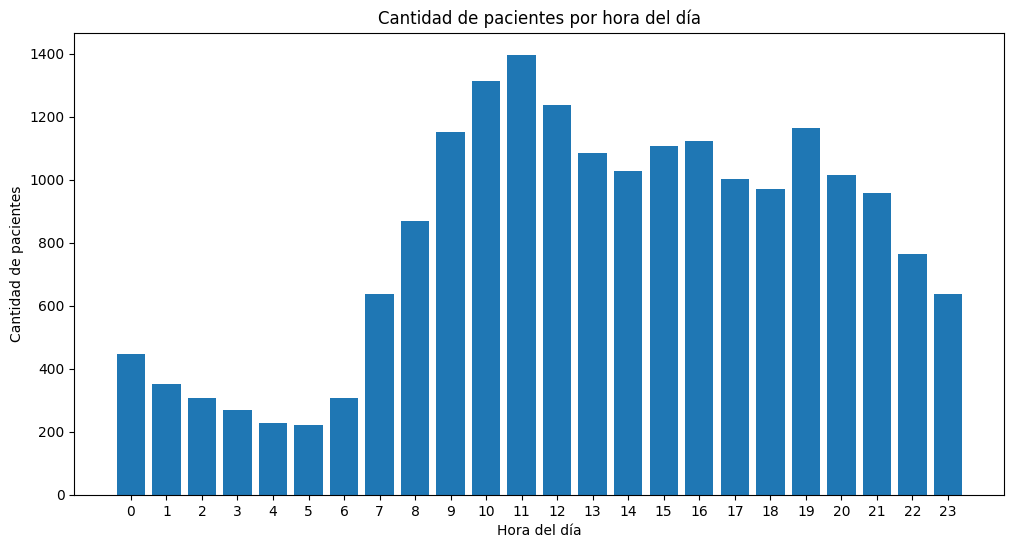

In [4]:
# Convertir la columna 'INICIO_ATENCION' a tipo datetime
df['INICIO_ATENCION'] = pd.to_datetime(df['INICIO_ATENCION'])

# Extraer la hora del día y el mes
df['HORA_DEL_DIA_ATENCION'] = df['INICIO_ATENCION'].dt.hour
df['MES_ANO_ATENCION'] = df['INICIO_ATENCION'].dt.month_name()

# Análisis de la llegada de pacientes por hora del día
conteo_por_hora = df.groupby('HORA_DEL_DIA_ATENCION').size()
plt.figure(figsize=(12, 6))
plt.bar(conteo_por_hora.index, conteo_por_hora.values)
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pacientes')
plt.title('Cantidad de pacientes por hora del día')
# Ajustar el eje x para que vaya de 0 a 24 con intervalos de 1
plt.xticks(range(0, 24, 1))
plt.show()


In [5]:
media = df['HORA_DEL_DIA_ATENCION'].mean()
#desviacion estandar
desviacion = df['HORA_DEL_DIA_ATENCION'].std()

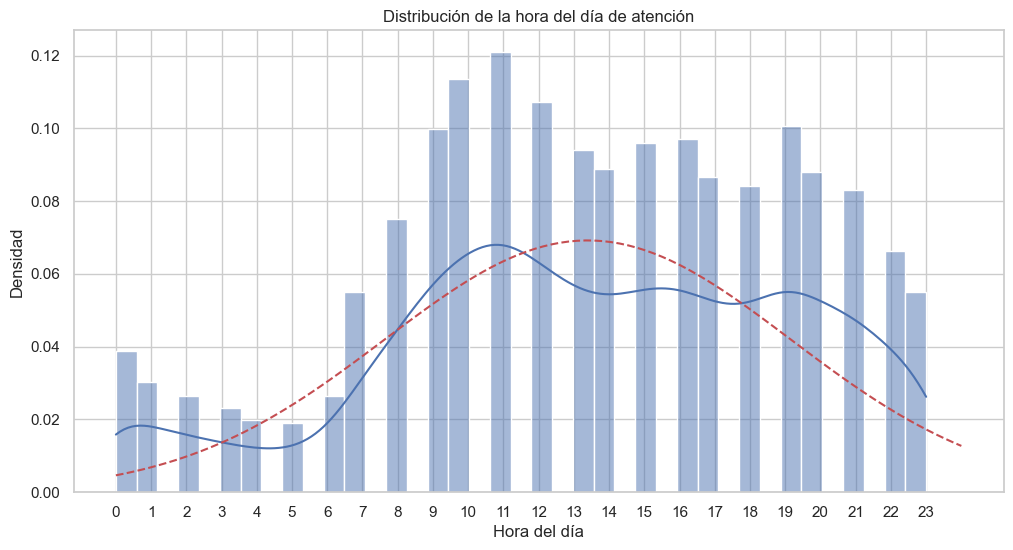

In [19]:
#grafico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Distribución de la hora del día de atención')
sns.histplot(df['HORA_DEL_DIA_ATENCION'], kde=True, stat='density')
plt.xlabel('Hora del día')
plt.ylabel('Densidad')
# Añadir la distribución normal
x = np.linspace(0, 24, 100)
y = norm.pdf(x, media, desviacion)
plt.plot(x, y, 'r--')
plt.xticks(range(0, 24, 1))
plt.show()


In [5]:
df

,ID_ATENCION,INICIO_ATENCION,FIN_ATENCION,GENERO,ID_PACIENTE,HORA_DEL_DIA_ATENCION,MES_ANO_ATENCION
0,37437,2023-01-01 00:32:37,2023-01-01 06:55:00,M,793160,0,January
1,37438,2023-01-01 02:13:29,2023-01-01 06:56:00,M,982156,2,January
2,37439,2023-01-01 02:24:01,2023-01-01 04:41:00,F,731265,2,January
3,37440,2023-01-01 03:50:46,2023-01-01 06:50:00,F,985821,3,January
4,37441,2023-01-01 04:43:02,2023-01-01 08:25:00,F,733123,4,January
...,...,...,...,...,...,...,...
19586,120140,2023-12-31 21:20:02,2024-01-01 01:59:00,M,984279,21,December
19587,120141,2023-12-31 21:28:27,2024-01-01 00:37:00,M,434966,21,December
19588,120142,2023-12-31 21:45:54,2024-01-01 02:00:00,M,995075,21,December
19589,120146,2023-12-31 22:34:01,2024-01-01 04:57:00,M,2144,22,December


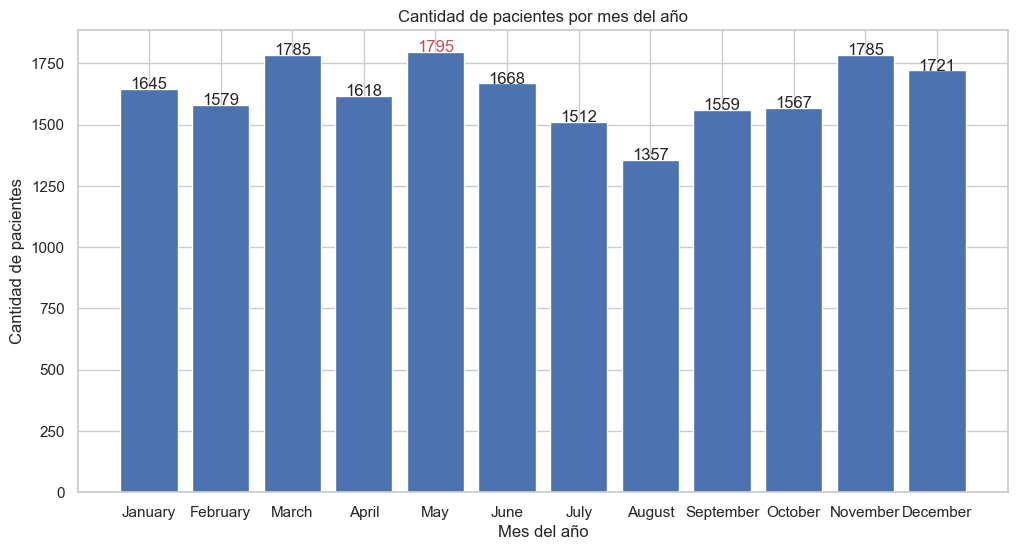

In [15]:
# Análisis de la llegada de pacientes por mes del año
conteo_por_mes = df.groupby('MES_ANO_ATENCION').size().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.figure(figsize=(12, 6))
#visualizar encima de cada barra el valor
for i in range(len(conteo_por_mes)):
    # marcar de rojo el máximo valor
    if conteo_por_mes[i] == conteo_por_mes.max():
        plt.text(i, conteo_por_mes[i], conteo_por_mes[i], ha = 'center', color = 'r')
    else:
        plt.text(i, conteo_por_mes[i], conteo_por_mes[i], ha = 'center')
plt.bar(conteo_por_mes.index, conteo_por_mes.values)
plt.xlabel('Mes del año')
plt.ylabel('Cantidad de pacientes')
plt.title('Cantidad de pacientes por mes del año')

plt.show()